In [1]:
from PEMD.analysis import prop, msd as msd_module, conductivity

### 1. Prepare the input parameter 

In [13]:
work_dir = '/home/tsd/polymer/MD/PEO/LI_EO/0.3/MD_dir'

data_tpr_file = 'nvt_prod.tpr'
dcd_xtc_file = 'unwrapped_traj.xtc'
select_cations = 'resname LIP'  
select_anions = 'resname NSC'

dt = 0.001
dt_collection = 5e3
run_start = int(3.9e8)
nsteps = 4e8
T = 333 # K
interval_time = 5e3     # slope range 5ns

### 2. Obtain the atom position

In [14]:
# Calculate the positions of ions in a molecular dynamics simulation.

(
    run, 
    cations, 
    cations_list, 
    anions, 
    anions_list, 
    times,
) = msd_module.get_position(
    work_dir, 
    data_tpr_file, 
    dcd_xtc_file, 
    select_cations, 
    select_anions, 
    dt, 
    dt_collection, 
    run_start, 
    nsteps,
    format='GROMACS',
)

In [15]:
# Generates arrays of position data for cations and anions relative to the center of mass of the system.

(
    cation_positions, 
    anion_positions,
)= msd_module.create_position_arrays(
    run, 
    cations_list, 
    anions_list, 
    times, 
    run_start, 
    dt_collection,
)

  0%|          | 0/2001 [00:00<?, ?it/s]

### 3. Calculate the MSD and Self-Diffusion Coefficient

In [16]:
# Calculate the self-diffusion coefficient for cation.
(
    msd_cation, 
    D_cation, 
    time_range_cation,
) = msd_module.compute_self_diffusion(
    cation_positions, 
    times, 
    dt_collection, 
    dt, 
    interval_time,
)

# Calculate the self-diffusion coefficient for anion.
(
    msd_anion, 
    D_anion, 
    time_range_anion,
) = msd_module.compute_self_diffusion(
    anion_positions, 
    times, 
    dt_collection, 
    dt, 
    interval_time,
)

Calculating MSD:   0%|          | 0/300 [00:00<?, ?it/s]

Calculating MSD:   0%|          | 0/300 [00:00<?, ?it/s]

In [8]:
D_cation

4.339925833760959e-09

In [9]:
D_anion

8.091194349748796e-09

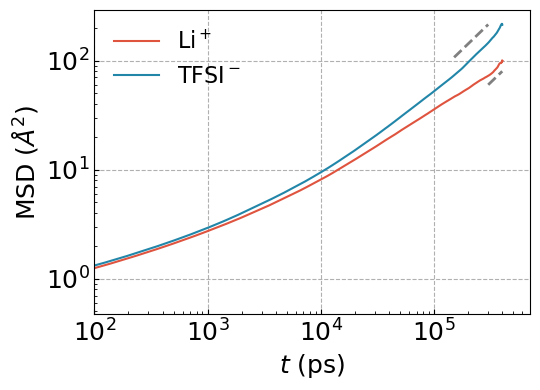

In [15]:
# plotting log-log scale mean squared displacement (MSD) for Ion.
import matplotlib.pyplot as plt

font_list = {"title" : 20, "label":18, "legend":16, "ticket": 18, "data": 14} 
linewith = 1.5
markersize = 5
color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]

x_log = times[30000:60000]
y_log = x_log/1400
x_log2 = times[60000:80000]
y_log2 = x_log2/5000
fig, ax = plt.subplots()
ax.plot(times[1:], msd_cation[1:], '-', linewidth=linewith, color = color_list[0], label="Li$^+$")
ax.plot(times[1:], msd_anion[1:], '-', linewidth=linewith, color = color_list[1], label="TFSI$^-$")

ax.plot(x_log, y_log, '--', linewidth=2, color="grey")
ax.plot(x_log2, y_log2, '--', linewidth=2, color="grey")

ax.legend(fontsize=font_list["legend"], frameon=False)
ax.set_xlabel(r'$t$ (ps)', fontsize=font_list["label"])
ax.set_ylabel(r'MSD ($\AA^2$)', fontsize=font_list["label"])
ax.tick_params(axis='both', which='both', direction='in',labelsize=font_list["ticket"])
# ax.tick_params(axis='y', labelsize=font_list["ticket"], direction='in', length=6, width=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim()
ax.set_xlim(1e2,)
# ax.set_ylim(1e0, 2e2)

ax.grid(True, linestyle='--')
fig.set_size_inches(5.5,4)
plt.tight_layout()

# Save the plot
plt.savefig('msd.tif', bbox_inches='tight', dpi=300)
plt.show()

### 4. Calculate the conductivity

In [17]:
(
    msd_total, 
    cond, 
    time_range
) = conductivity.compute_conductivity(
    run, 
    run_start, 
    dt_collection, 
    cations_list, 
    anions_list, 
    times, 
    dt, 
    T,
    interval_time
)

  0%|          | 0/2001 [00:00<?, ?it/s]

In [7]:
cond

0.004062331051522571

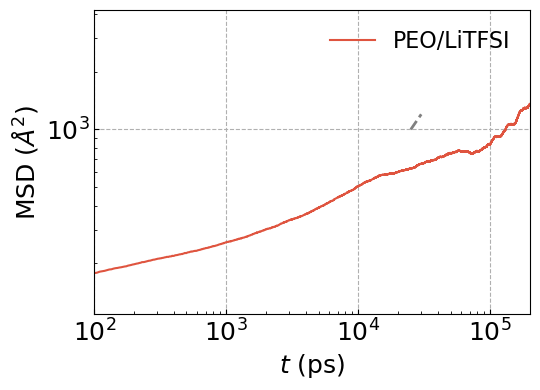

In [8]:
# plotting log-log scale mean squared displacement (MSD) for Ion.
import matplotlib.pyplot as plt

font_list = {"title" : 20, "label":18, "legend":16, "ticket": 18, "data": 14} 
linewith = 1.5
markersize = 5
color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]

#time = np.arange(run_start/100, run_end/100, 1/100)
# time = np.arange(run_start*10, run_end*10, 10)   # timestep:10 ps, unit: ps
x_log = times[5000:6000]
y_log = x_log/25
# x_log2 = times[18000:40000]
# y_log2 = x_log2/2800
fig, ax = plt.subplots()
ax.plot(times[1:], msd_total[1:], '-', linewidth=linewith, color = color_list[0], label="PEO/LiTFSI")
# ax.plot(times[1:], msd_anion[1:], '-', linewidth=linewith, color = color_list[1], label="TFSI$^-$")

ax.plot(x_log, y_log, '--', linewidth=2, color="grey")
# ax.plot(x_log2, y_log2, '--', linewidth=2, color="grey")

ax.legend(fontsize=font_list["legend"], frameon=False)
ax.set_xlabel(r'$t$ (ps)', fontsize=font_list["label"])
ax.set_ylabel(r'MSD ($\AA^2$)', fontsize=font_list["label"])
ax.tick_params(axis='both', which='both', direction='in',labelsize=font_list["ticket"])
# ax.tick_params(axis='y', labelsize=font_list["ticket"], direction='in', length=6, width=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(100, 200000)
# ax.set_ylim(1e0, 2e2)

ax.grid(True, linestyle='--')
fig.set_size_inches(5.5,4)
plt.tight_layout()

# Save the plot
plt.savefig('msd.tif', bbox_inches='tight', dpi=300)
plt.show()

### calculate the transfer number

In [25]:
msds_all = msd_module.compute_all_Lij(cation_positions, anion_positions, times)

Calculating MSD:   0%|          | 0/200 [00:00<?, ?it/s]

Calculating MSD:   0%|          | 0/200 [00:00<?, ?it/s]

In [26]:
interval_time = 5000
slope_plusplus, time_range_plusplus = msd_module.compute_slope_msd(msds_all[0], times, dt_collection, dt, interval_time)

/home/tsd/soft/PEMD/PEMD/analysis/msd.py:144: RuntimeWarning: divide by zero encountered in log
  log_time = np.log(times)
/home/tsd/soft/PEMD/PEMD/analysis/msd.py:145: RuntimeWarning: divide by zero encountered in log
  log_msd = np.log(msd)
/home/tsd/soft/PEMD/PEMD/analysis/msd.py:162: RuntimeWarning: invalid value encountered in scalar divide
  slope_log = delta_y / delta_x


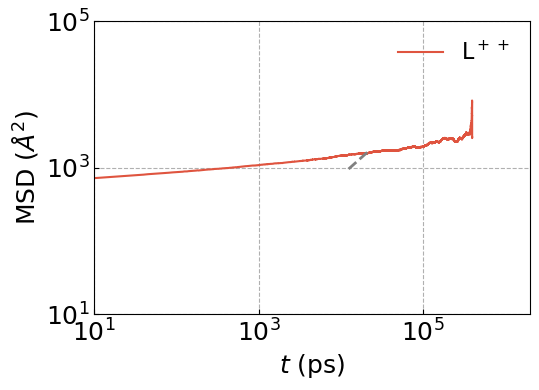

In [27]:
import matplotlib.pyplot as plt
# plot ion msd
# run_start = 0
# run_end = int(39921)

font_list = {"title" : 20, "label":18, "legend":16, "ticket": 18, "data": 14} 
linewith = 1.5
markersize = 5
color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]

#msd_cation = np.loadtxt(f'msdcation_{sys}_{rep}.txt')
#msd_anion = np.loadtxt(f'msdanion_{sys}_{rep}.txt')

#time = np.arange(run_start/100, run_end/100, 1/100)
# time = np.arange(run_start*10, run_end*10, 10)   # timestep:10 ps, unit: ps
x_log = times[2500:4500]
y_log = x_log/13
# x_log2 = times[18000:40000]
# y_log2 = x_log2/2800
fig, ax = plt.subplots()
ax.plot(times[1:], msds_all[0][1:], '-', linewidth=linewith, color = color_list[0], label="L$^+$$^+$")
# ax.plot(times[1:], msd_anion[1:], '-', linewidth=linewith, color = color_list[1], label="TFSI$^-$")

ax.plot(x_log, y_log, '--', linewidth=2, color="grey")
# ax.plot(x_log2, y_log2, '--', linewidth=2, color="grey")

ax.legend(fontsize=font_list["legend"], frameon=False)
ax.set_xlabel(r'$t$ (ps)', fontsize=font_list["label"])
ax.set_ylabel(r'MSD ($\AA^2$)', fontsize=font_list["label"])
ax.tick_params(axis='both', which='both', direction='in',labelsize=font_list["ticket"])
# ax.tick_params(axis='y', labelsize=font_list["ticket"], direction='in', length=6, width=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1, 2e6)
ax.set_ylim(1e1, 1e5)

ax.grid(True, linestyle='--')
fig.set_size_inches(5.5,4)
plt.tight_layout()

# Save the plot
plt.savefig('L++.tif', bbox_inches='tight', dpi=300)
plt.show()

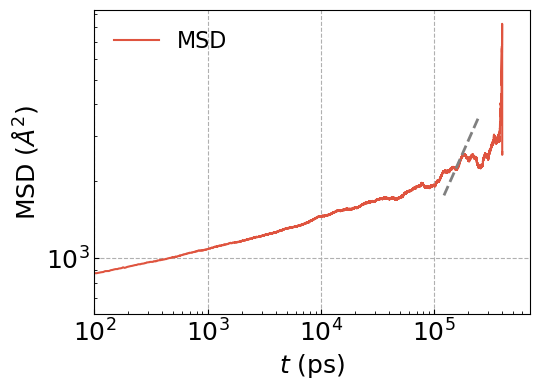

In [28]:

msd_module.plot_msd(msds_all[0], times, time_range_plusplus, dt_collection, dt, 'MSD', 'msd.png')

/home/tsd/soft/PEMD/PEMD/analysis/msd.py:144: RuntimeWarning: divide by zero encountered in log
  log_time = np.log(times)
/home/tsd/soft/PEMD/PEMD/analysis/msd.py:145: RuntimeWarning: divide by zero encountered in log
  log_msd = np.log(msd)
/home/tsd/soft/PEMD/PEMD/analysis/msd.py:162: RuntimeWarning: invalid value encountered in scalar divide
  slope_log = delta_y / delta_x


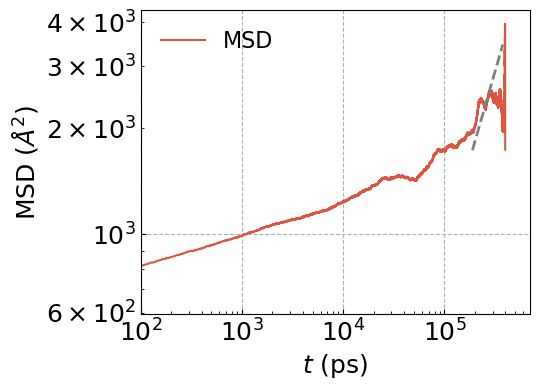

In [29]:
slope_minusminus, time_range_minusminus = msd_module.compute_slope_msd(msds_all[2], times, dt_collection, dt, interval_time)
msd_module.plot_msd(msds_all[2], times, time_range_minusminus, dt_collection, dt, 'MSD', 'msd.png')

/home/tsd/soft/PEMD/PEMD/analysis/msd.py:144: RuntimeWarning: divide by zero encountered in log
  log_time = np.log(times)


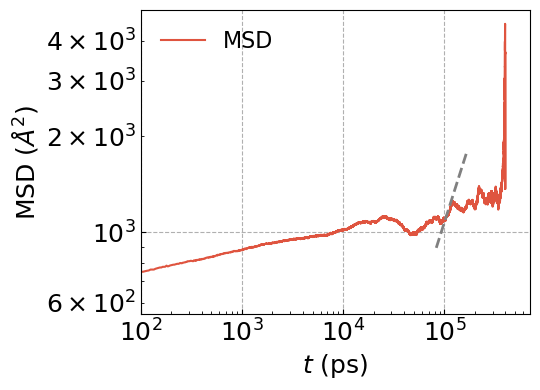

In [30]:
# interval_time = 5000
slope_plusminus, time_range_plusminus = msd_module.compute_slope_msd(msds_all[4], times, dt_collection, dt, interval_time)
msd_module.plot_msd(msds_all[4], times, time_range_plusminus, dt_collection, dt, 'MSD', 'msd.png')

In [22]:
msds_all[4]

array([-1.8189894035458565e-12,  2.0489306398558710e+02,
        2.1742787097048677e+02, ..., -1.1341990522713506e+04,
       -1.1595807073679784e+04, -1.1936985348369553e+04])

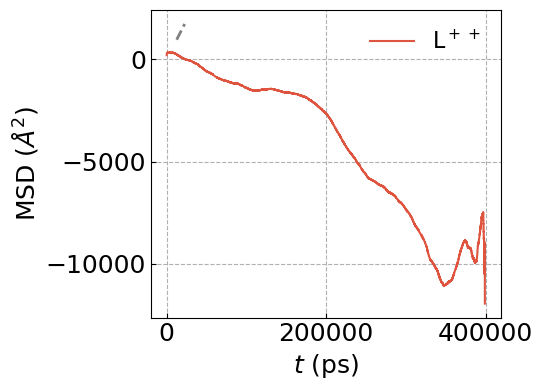

In [23]:
import matplotlib.pyplot as plt
# plot ion msd
# run_start = 0
# run_end = int(39921)

font_list = {"title" : 20, "label":18, "legend":16, "ticket": 18, "data": 14} 
linewith = 1.5
markersize = 5
color_list = ["#DF543F", "#2286A9", "#FBBF7C", "#3C3846"]

#msd_cation = np.loadtxt(f'msdcation_{sys}_{rep}.txt')
#msd_anion = np.loadtxt(f'msdanion_{sys}_{rep}.txt')

#time = np.arange(run_start/100, run_end/100, 1/100)
# time = np.arange(run_start*10, run_end*10, 10)   # timestep:10 ps, unit: ps
x_log = times[2500:4500]
y_log = x_log/13
# x_log2 = times[18000:40000]
# y_log2 = x_log2/2800
fig, ax = plt.subplots()
ax.plot(times[1:], msds_all[4][1:], '-', linewidth=linewith, color = color_list[0], label="L$^+$$^+$")
# ax.plot(times[1:], msd_anion[1:], '-', linewidth=linewith, color = color_list[1], label="TFSI$^-$")

ax.plot(x_log, y_log, '--', linewidth=2, color="grey")
# ax.plot(x_log2, y_log2, '--', linewidth=2, color="grey")

ax.legend(fontsize=font_list["legend"], frameon=False)
ax.set_xlabel(r'$t$ (ps)', fontsize=font_list["label"])
ax.set_ylabel(r'MSD ($\AA^2$)', fontsize=font_list["label"])
ax.tick_params(axis='both', which='both', direction='in',labelsize=font_list["ticket"])
# ax.tick_params(axis='y', labelsize=font_list["ticket"], direction='in', length=6, width=2)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(1e1, 2e6)
# ax.set_ylim(1e1, 1e5)

ax.grid(True, linestyle='--')
fig.set_size_inches(5.5,4)
plt.tight_layout()

# Save the plot
plt.savefig('L++.tif', bbox_inches='tight', dpi=300)
plt.show()